In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist=input_data.read_data_sets("./mnist/data/",one_hot=True)

W0819 04:28:48.325124 140030088619904 deprecation.py:323] From <ipython-input-5-613c41b1bcd6>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0819 04:28:48.328006 140030088619904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0819 04:28:48.331629 140030088619904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz


W0819 04:28:48.743639 140030088619904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0819 04:28:48.747850 140030088619904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0819 04:28:48.840430 140030088619904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [0]:
x=tf.placeholder(tf.float32, [None,28,28,1])
y=tf.placeholder(tf.float32, [None,10])
keep_prob=tf.placeholder(tf.float32)

In [0]:
w1=tf.get_variable("w1",shape=[3,3,1,32],initializer=tf.contrib.layers.xavier_initializer())
# w1=tf.Variable(tf.random_normal([3,3,1,32]))
#[3,3] :필터(커널)크기, 1:채널 특성, 32:필터 개수
L1=tf.nn.conv2d(x,w1,strides=[1,1,1,1], padding='SAME')               
               #strides=[1,칸,줄,1]
L1=tf.nn.relu(L1)        
L1=tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
#X:[None,28,28,1]
#W1:[3 3 1 32]
#L1: CONV -> [None,28,28,32]
#pooling => [None,14,14,32]
               
w2=tf.get_variable("w2",shape=[3,3,32,64],initializer=tf.contrib.layers.xavier_initializer())
w2=tf.Variable(tf.random_normal([3,3,32,64]))
#[3,3] :필터(커널)크기, 32:채널 특성, 64:필터 개수
L2=tf.nn.conv2d(L1,w2,strides=[1,1,1,1], padding='SAME')               
               #strides=[1,칸,줄,1]
L2=tf.nn.relu(L2)        
L2=tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
#L2 CONV => [None, 14, 14, 64]
#pooling => [None, 7, 7, 64]

#FC계층: 입력 7*7*64 -> 출력 256
# w3=tf.Variable(tf.random_normal([7*7*64, 256]))
w3=tf.get_variable("w3",[7*7*64, 256],initializer=tf.contrib.layers.xavier_initializer())
L3=tf.reshape(L2, [-1, 7*7*64])
L3=tf.matmul(L3,w3) #[-1,256]
L3=tf.nn.relu(L3)
L3=tf.nn.dropout(L3, keep_prob)

w4=tf.get_variable("w4",[256, 10],initializer=tf.contrib.layers.xavier_initializer())
model=tf.matmul(L3, w4)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
optimizer=tf.train.AdamOptimizer(0.01).minimize(cost)            

In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  batch_size = 100
  total_batch = mnist.train.num_examples // batch_size
  for epoch in range(10):
    total_cost = 0
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      batch_xs = batch_xs.reshape(-1,28,28,1)
      _, cv = sess.run([optimizer, cost],
                      feed_dict={x:batch_xs, y:batch_ys, keep_prob:0.7})
      total_cost += cv / total_batch
    print("epoch : {}, avg_cost : {:.3f}".format(epoch+1, total_cost))
  print("model created")

  is_correct = tf.cast(tf.equal(tf.arg_max(model,1), tf.argmax(y,1)), dtype=tf.float32)
  accuracy = tf.reduce_mean(is_correct)
  print("accuracy : {}".format(sess.run(accuracy, feed_dict={x:mnist.test.images.reshape(-1,28,28,1),
                                                            y:mnist.test.labels,
                                                          keep_prob:1})))

epoch : 1, avg_cost : 0.388
epoch : 2, avg_cost : 0.094
epoch : 3, avg_cost : 0.078
epoch : 4, avg_cost : 0.065
epoch : 5, avg_cost : 0.067
epoch : 6, avg_cost : 0.065
epoch : 7, avg_cost : 0.058
epoch : 8, avg_cost : 0.066
epoch : 9, avg_cost : 0.065
epoch : 10, avg_cost : 0.060
model created
accuracy : 0.9865999817848206


In [0]:
w1=tf.Variable(tf.random_normal([3,3,1,32]))
#[3,3] :필터(커널)크기, 1:채널 특성, 32:필터 개수
L1=tf.nn.conv2d(x,w1,strides=[1,1,1,1], padding='SAME')               
               #strides=[1,칸,줄,1]
L1=tf.nn.relu(L1)        
L1=tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
#X:[None,28,28,1]
#W1:[3 3 1 32]
#L1: CONV -> [None,28,28,32]
#pooling => [None,14,14,32]
               
w2=tf.Variable(tf.random_normal([3,3,32,64]))
#[3,3] :필터(커널)크기, 32:채널 특성, 64:필터 개수
L2=tf.nn.conv2d(L1,w2,strides=[1,1,1,1], padding='SAME')               
               #strides=[1,칸,줄,1]
L2=tf.nn.relu(L2)        
L2=tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
#L2 CONV => [None, 14, 14, 64]
#pooling => [None, 7, 7, 64]

#FC계층: 입력 7*7*64 -> 출력 256
w3=tf.Variable(tf.random_normal([7*7*64, 256]))
L3=tf.reshape(L2, [-1, 7*7*64])
L3=tf.matmul(L3,w3) #[-1,256]
L3=tf.nn.relu(L3)
L3=tf.nn.dropout(L3, keep_prob)

w4=tf.Variable(tf.random_normal([256,10]))
model=tf.matmul(L3, w4)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)            

In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  batch_size = 100
  total_batch = mnist.train.num_examples // batch_size
  for epoch in range(25):
    total_cost = 0
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      batch_xs = batch_xs.reshape(-1,28,28,1)
      _, cv = sess.run([optimizer, cost],
                      feed_dict={x:batch_xs, y:batch_ys, keep_prob:0.7})
      total_cost += cv / total_batch
    print("epoch : {}, avg_cost : {:.3f}".format(epoch+1, total_cost))
  print("model created")

  is_correct = tf.cast(tf.equal(tf.arg_max(model,1), tf.argmax(y,1)), dtype=tf.float32)
  accuracy = tf.reduce_mean(is_correct)
  print("accuracy : {}".format(sess.run(accuracy, feed_dict={x:mnist.test.images.reshape(-1,28,28,1),
                                                            y:mnist.test.labels,
                                                          keep_prob:1})))

epoch : 1, avg_cost : 1052.954
epoch : 2, avg_cost : 111.274
epoch : 3, avg_cost : 48.615
epoch : 4, avg_cost : 16.663
epoch : 5, avg_cost : 4.793
epoch : 6, avg_cost : 2.739
epoch : 7, avg_cost : 2.222
epoch : 8, avg_cost : 2.010
epoch : 9, avg_cost : 1.822
epoch : 10, avg_cost : 1.792
epoch : 11, avg_cost : 1.698
epoch : 12, avg_cost : 1.600
epoch : 13, avg_cost : 1.594
epoch : 14, avg_cost : 1.548
epoch : 15, avg_cost : 1.476
epoch : 16, avg_cost : 1.408
epoch : 17, avg_cost : 1.428
epoch : 18, avg_cost : 1.377
epoch : 19, avg_cost : 1.356
epoch : 20, avg_cost : 1.299
epoch : 21, avg_cost : 1.299
epoch : 22, avg_cost : 1.259
epoch : 23, avg_cost : 1.227
epoch : 24, avg_cost : 1.168
epoch : 25, avg_cost : 1.148
model created
accuracy : 0.6969000101089478


# Layers 이용

In [0]:
# tf.layers subpackage 이용 cnn modeling

In [0]:
x = tf.placeholder(tf.float32, [None,28,28,1])
y = tf.placeholder(tf.float32, [None,10])

In [0]:
L1 = tf.layers.conv2d(x,32,[3,3],activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(L1,[2,2],[2,2])
L1 = tf.layers.dropout(L1,0.7)

L2 = tf.layers.conv2d(x,64,[3,3],activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(L2,[2,2],[2,2])
L2 = tf.layers.dropout(L2,0.7)

L3 = tf.layers.conv2d(x,128,[3,3],activation=tf.nn.relu)
L3 = tf.layers.max_pooling2d(L3,[2,2],[2,2])
L3 = tf.layers.dropout(L3,0.7)

L4 = tf.contrib.layers.flatten(L3)
L4 = tf.layers.dense(L4, 256, activation=tf.nn.relu)
L4 = tf.layers.dropout(L4,0.5)

model = tf.layers.dense(L4, 10, activation=None)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
train = tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  batch_size = 100
  total_batch = mnist.train.num_examples // batch_size
  for epoch in range(25):
    total_cost = 0
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      batch_xs = batch_xs.reshape(-1,28,28,1)
      _, cv = sess.run([train, cost],
                      feed_dict={x:batch_xs, y:batch_ys, keep_prob:0.7})
      total_cost += cv / total_batch
    print("epoch : {}, avg_cost : {:.3f}".format(epoch+1, total_cost))
  print("model created")

  is_correct = tf.cast(tf.equal(tf.arg_max(model,1), tf.argmax(y,1)), dtype=tf.float32)
  accuracy = tf.reduce_mean(is_correct)
  print("accuracy : {}".format(sess.run(accuracy, feed_dict={x:mnist.test.images.reshape(-1,28,28,1),
                                                            y:mnist.test.labels,
                                                          keep_prob:1})))

epoch : 1, avg_cost : 0.150
epoch : 2, avg_cost : 0.048
epoch : 3, avg_cost : 0.028
epoch : 4, avg_cost : 0.019
epoch : 5, avg_cost : 0.012
epoch : 6, avg_cost : 0.009
epoch : 7, avg_cost : 0.009
epoch : 8, avg_cost : 0.005
epoch : 9, avg_cost : 0.004
epoch : 10, avg_cost : 0.006
epoch : 11, avg_cost : 0.004
epoch : 12, avg_cost : 0.003
epoch : 13, avg_cost : 0.002
epoch : 14, avg_cost : 0.005
epoch : 15, avg_cost : 0.004
epoch : 16, avg_cost : 0.002
epoch : 17, avg_cost : 0.003
epoch : 18, avg_cost : 0.002
epoch : 19, avg_cost : 0.003
epoch : 20, avg_cost : 0.002
epoch : 21, avg_cost : 0.000
epoch : 22, avg_cost : 0.000
epoch : 23, avg_cost : 0.000
epoch : 24, avg_cost : 0.000
epoch : 25, avg_cost : 0.000
model created
accuracy : 0.9887999892234802


In [0]:
from keras import layers
from keras import models

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3),activation='relu'))

In [0]:
model.add(layers.Flatten())

In [0]:
model.add(layers.Dense(64, activation='relu'))

In [0]:
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                36928     
__________

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((-1,28,28,1))
test_images = test_images.astype('float32')/255

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
import keras

class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.acces = []
        self.val_acces = []


  def on_batch_end(self, batch, logs={}):
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.acces.append(logs.get('acc'))
    self.val_acces.append(logs.get('val_acc'))

In [0]:
loss_history = LossHistory()

In [0]:
model.fit(train_images, train_labels, epochs=5, batch_size=256,\
          validation_data=(test_images, test_labels), callbacks=[loss_history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3486 - acc: 0.8919 - val_loss: 0.1340 - val_acc: 0.9561
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0764 - acc: 0.9760 - val_loss: 0.0709 - val_acc: 0.9771
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0478 - acc: 0.9847 - val_loss: 0.0368 - val_acc: 0.9887
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0356 - acc: 0.9890 - val_loss: 0.0480 - val_acc: 0.9843
Epoch 5/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.0279 - val_acc: 0.9914


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 1s 90us/step
0.027899222914595158 0.9914


In [0]:
history = model.history

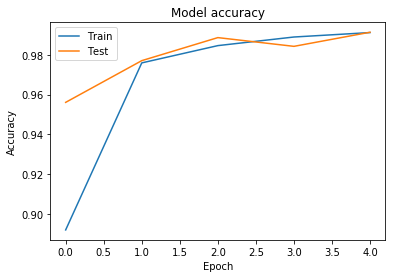

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

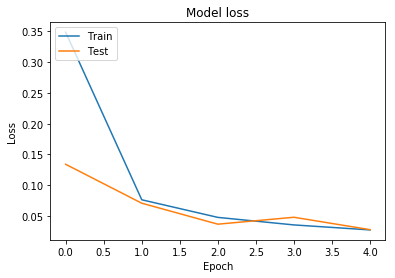

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
type(loss_history.val_acces)

list

In [0]:
import pandas as pd
pd.Series(loss_history.val_acces).value_counts()

Series([], dtype: int64)

In [0]:
pd.Series(loss_history.acces).value_counts()

0.988281    173
0.992188    162
0.984375    136
0.996094    125
0.980469     99
0.976562     86
0.972656     53
1.000000     45
0.968750     44
0.964844     32
0.957031     27
0.960938     23
0.949219     17
0.941406     15
0.953125     13
0.945312      9
0.937500      7
0.929688      6
0.914062      6
0.933594      6
0.902344      6
0.910156      5
0.925781      4
0.898438      4
0.796875      3
0.789062      3
0.847656      3
0.906250      3
0.824219      3
0.921875      3
           ... 
0.648438      1
0.460938      1
0.449219      1
0.414062      1
0.398438      1
0.468750      1
0.363281      1
0.136719      1
0.785156      1
0.769531      1
0.472656      1
0.542969      1
0.730469      1
0.433594      1
0.554688      1
0.679688      1
0.773438      1
0.804688      1
0.863281      1
0.777344      1
0.800781      1
0.683594      1
0.753906      1
0.820312      1
0.832031      1
0.867188      1
0.855469      1
0.882812      1
0.989583      1
0.109375      1
Length: 77, dtype: int64

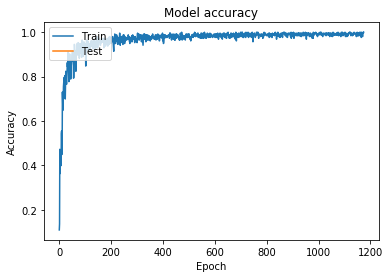

In [0]:
import matplotlib.pyplot as plt

plt.plot(loss_history.acces)
plt.plot(loss_history.val_acces)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

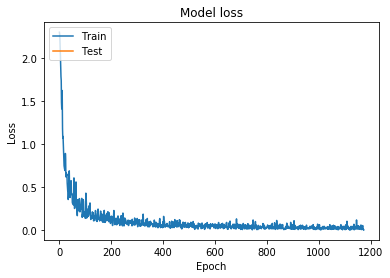

In [0]:
# Plot training & validation loss values
plt.plot(loss_history.losses)
plt.plot(loss_history.val_losses)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
history.history.values

<function dict.values>